# Import liabraries



In [154]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np


from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Load Data

In [155]:
frankfurt=pd.read_csv('tomslee_airbnb_aarhus_0812_2017-01-21.csv')

In [156]:
frankfurt.head()

,room_id,host_id,room_type,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,minstay,latitude,longitude,last_modified
0,8395271,4159382,Shared room,NaN,24,0,0.0,1,1.0,67.0,NaN,56.162881,10.203689,2017-01-21 11:44:34.731553
1,7566424,30655819,Shared room,NaN,1,1,0.0,1,1.0,47.0,NaN,56.141997,10.206600,2017-01-21 11:44:33.996160
2,6702697,670310,Shared room,NaN,1,2,0.0,2,1.0,25.0,NaN,56.141973,10.206057,2017-01-21 11:44:32.921240
3,6778463,20693961,Shared room,NaN,3,0,0.0,5,1.0,10.0,NaN,56.173203,10.182304,2017-01-21 11:44:32.918071
4,9398947,48746007,Shared room,NaN,24,0,0.0,2,1.0,30.0,NaN,56.145004,10.188038,2017-01-21 11:44:32.912565


# Data Preparation

In [157]:
frankfurt.describe()

,room_id,host_id,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,minstay,latitude,longitude
count,2.167000e+03,2.167000e+03,0.0,2167.000000,2167.000000,2167.000000,2167.000000,2167.000000,2167.000000,0.0,2167.000000,2167.000000
mean,1.004675e+07,3.848914e+07,NaN,17.632210,5.761883,2.168436,3.276880,1.476696,73.587448,NaN,56.159651,10.196950
std,4.508689e+06,2.765181e+07,NaN,9.307457,10.421654,2.363496,1.595219,0.860161,43.868472,NaN,0.016552,0.020826
min,6.010800e+04,1.619110e+05,NaN,1.000000,0.000000,0.000000,1.000000,0.000000,10.000000,NaN,56.107708,10.104034
25%,6.665576e+06,1.594672e+07,NaN,6.000000,0.000000,0.000000,2.000000,1.000000,46.000000,NaN,56.148958,10.190677
50%,1.087912e+07,3.408013e+07,NaN,24.000000,2.000000,0.000000,3.000000,1.000000,65.000000,NaN,56.158366,10.199980
75%,1.373201e+07,5.674887e+07,NaN,24.000000,6.000000,4.500000,4.000000,2.000000,88.000000,NaN,56.166382,10.208410
max,1.686813e+07,1.121438e+08,NaN,24.000000,100.000000,5.000000,16.000000,10.000000,773.000000,NaN,56.244421,10.266615


In [158]:
frankfurt = frankfurt.drop(['borough','minstay','last_modified'], axis=1)

In [159]:
frankfurt = frankfurt.drop(['room_id','host_id'], axis=1)
frankfurt.head()

,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,latitude,longitude
0,Shared room,24,0,0.0,1,1.0,67.0,56.162881,10.203689
1,Shared room,1,1,0.0,1,1.0,47.0,56.141997,10.206600
2,Shared room,1,2,0.0,2,1.0,25.0,56.141973,10.206057
3,Shared room,3,0,0.0,5,1.0,10.0,56.173203,10.182304
4,Shared room,24,0,0.0,2,1.0,30.0,56.145004,10.188038


In [160]:
#cheaking is there any null values or not.
#if there is no null value, then our dataset is ready to go.
frankfurt.isnull().sum()

room_type               0
neighborhood            0
reviews                 0
overall_satisfaction    0
accommodates            0
bedrooms                0
price                   0
latitude                0
longitude               0
dtype: int64

# Exploratory Data Analysis

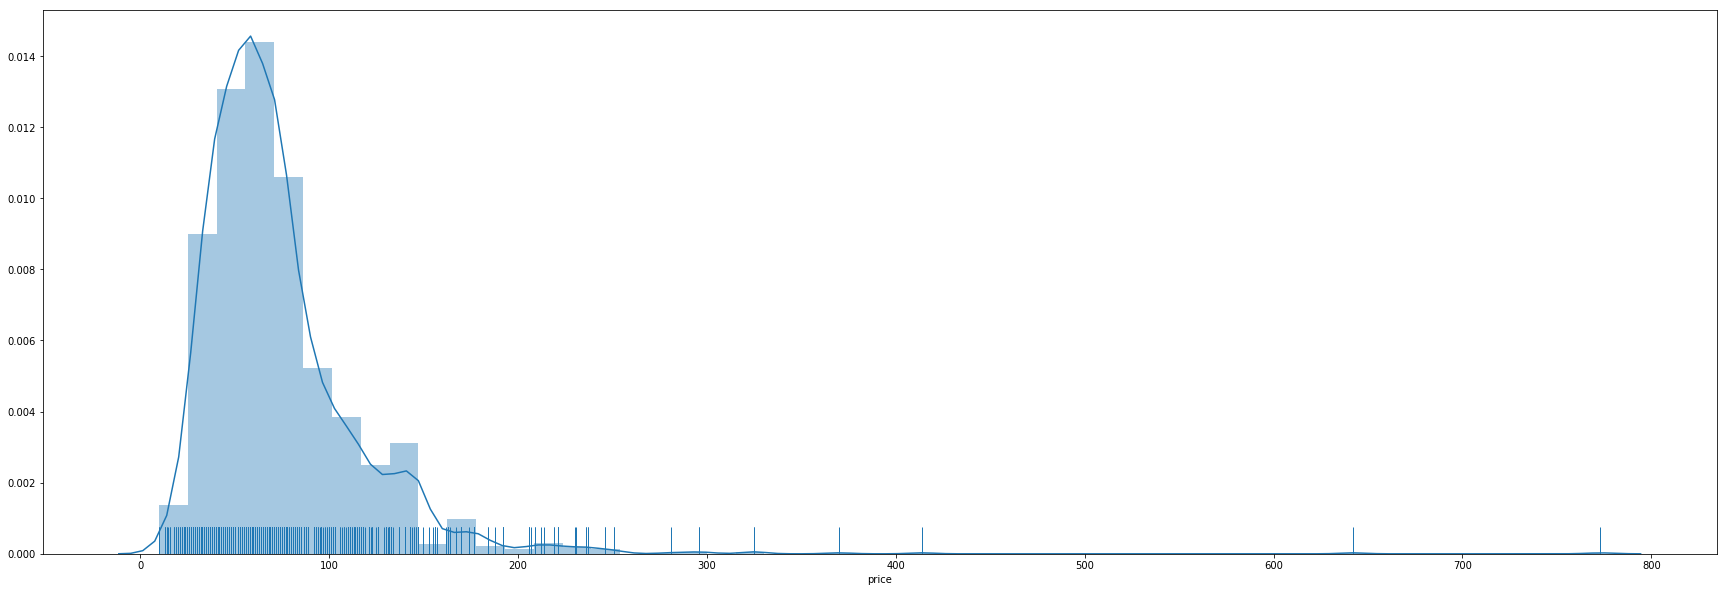

In [161]:
plt.figure(figsize=(30,10))
sb.distplot(frankfurt['price'], rug=True)

In [162]:
frankfurt['room_type'].unique()

array(['Shared room', 'Entire home/apt', 'Private room'], dtype=object)

D:\Installed Software\Anaconda\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


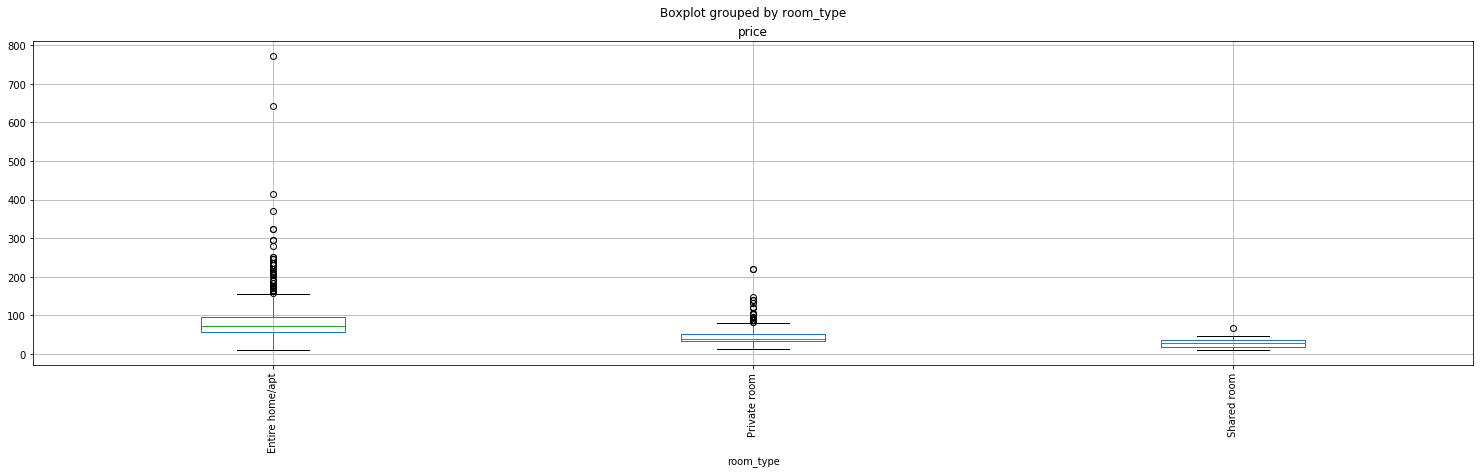

In [163]:
frankfurt.boxplot(column='price', by='room_type', figsize=(25,6), rot=90)

D:\Installed Software\Anaconda\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


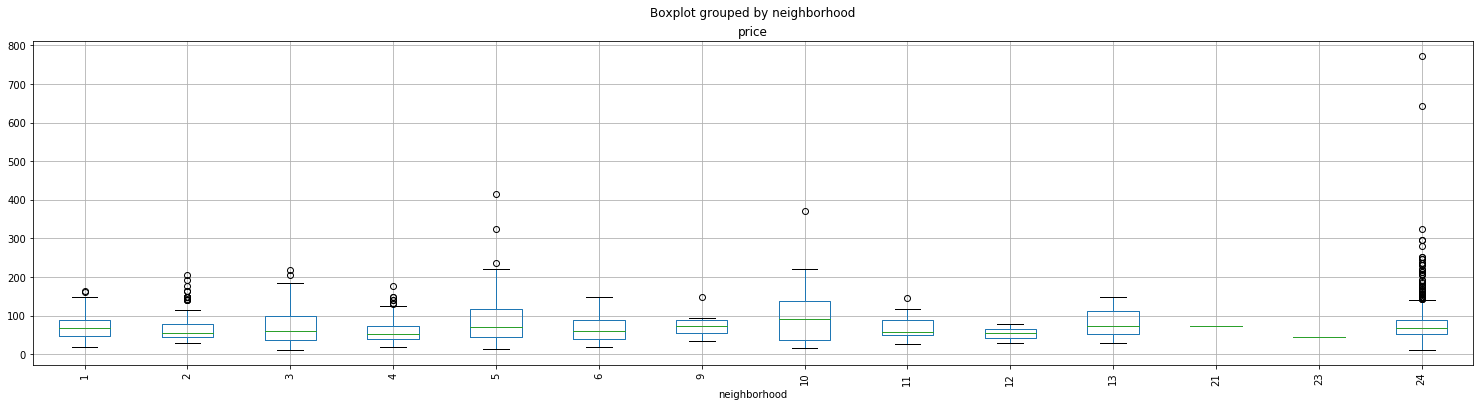

In [164]:
frankfurt.boxplot(column='price', by='neighborhood', figsize=(25,6), rot=90)

# What about longitue and latitude

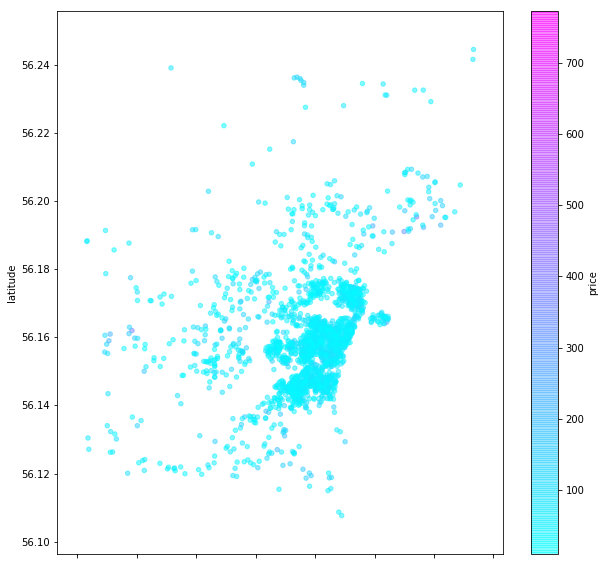

In [165]:
frankfurt.plot.scatter(x='longitude', y='latitude', c='price', figsize=(10,10), cmap='cool', alpha=0.5);

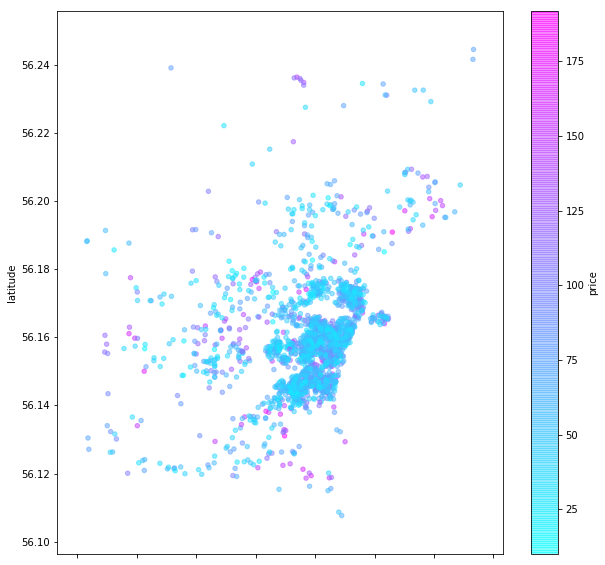

In [166]:
frankfurt[frankfurt['price']<200].plot.scatter(x='longitude', y='latitude', c='price', figsize=(10,10), cmap='cool', alpha=0.5);

# And reviews:

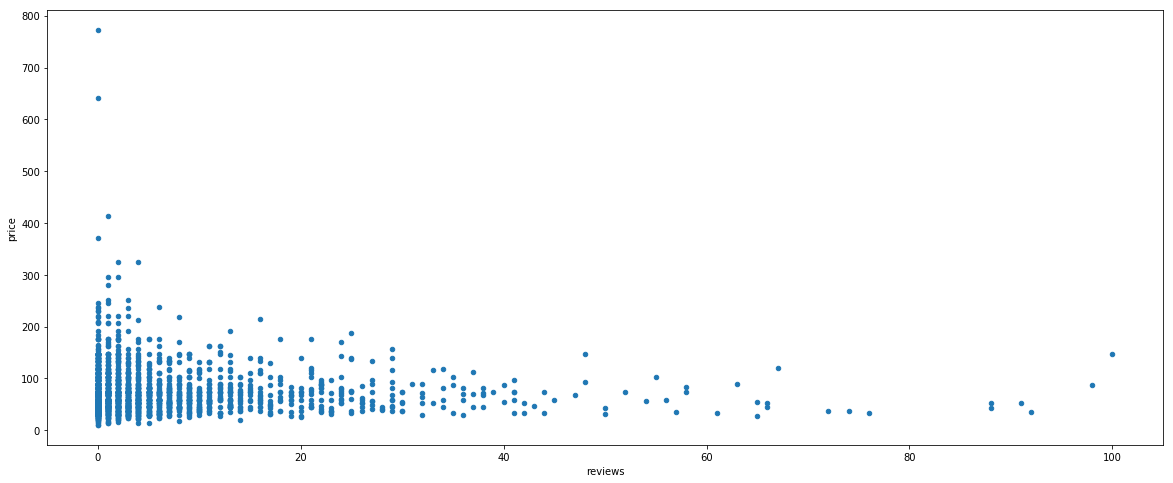

In [167]:
frankfurt.plot.scatter(x='reviews', y='price', figsize=(20,8));

# Feature Engineering

# With review

In [168]:
frankfurt['logreviews'] = np.log(1 + frankfurt['reviews'])
frankfurt['bedrooms_per_accommodates']=frankfurt['bedrooms']/frankfurt['accommodates']

In [169]:
frankfurt.head()

,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,latitude,longitude,logreviews,bedrooms_per_accommodates
0,Shared room,24,0,0.0,1,1.0,67.0,56.162881,10.203689,0.000000,1.0
1,Shared room,1,1,0.0,1,1.0,47.0,56.141997,10.206600,0.693147,1.0
2,Shared room,1,2,0.0,2,1.0,25.0,56.141973,10.206057,1.098612,0.5
3,Shared room,3,0,0.0,5,1.0,10.0,56.173203,10.182304,0.000000,0.2
4,Shared room,24,0,0.0,2,1.0,30.0,56.145004,10.188038,0.000000,0.5


# without review 

In [170]:
data=frankfurt.copy()
print('amount of fata original: ' + str(len(data)))
#data = data[data['reviews']>10]###
print('amount of data after removing "few reviwes" properties: '+ str(len(data)))

amount of fata original: 2167
amount of data after removing "few reviwes" properties: 2167


In [171]:
data = pd.get_dummies(data)
data.head()

,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,latitude,longitude,logreviews,bedrooms_per_accommodates,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,24,0,0.0,1,1.0,67.0,56.162881,10.203689,0.000000,1.0,0,0,1
1,1,1,0.0,1,1.0,47.0,56.141997,10.206600,0.693147,1.0,0,0,1
2,1,2,0.0,2,1.0,25.0,56.141973,10.206057,1.098612,0.5,0,0,1
3,3,0,0.0,5,1.0,10.0,56.173203,10.182304,0.000000,0.2,0,0,1
4,24,0,0.0,2,1.0,30.0,56.145004,10.188038,0.000000,0.5,0,0,1


In [172]:
#drop the price because we want to predict it.
X=data.copy().drop('price',axis=1)
#y will be the price.
y=data['price'].copy()

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [174]:
#train the machine
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled= scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Baseline


In [175]:
baseline= y_train.median() #mefin train
baseline_error = np.sqrt(mean_squared_error(y_pred=np.ones_like(y_test)*baseline,y_true=y_test))
baseline_error

44.06988746922115

# Machine Learing


In [176]:
lr = LinearRegression()
alphas= [1000, 100, 50, 20, 10, 1, 0.1, 0.01]
li_ratios=[0.001,0.01, 0.05, 0.1, 0.3, 0.5, 0.7, 0.9]
ridge= RidgeCV(alphas=alphas)
lasso=LassoCV(alphas=alphas, max_iter=10000)
li_ratio=li_ratios
elastic=ElasticNetCV(alphas=alphas)

In [177]:
for model, name in zip([lr, ridge, lasso, elastic], ["LinearRegression", "Ridge", "Lasso", "Elasticnet"]):
    model.fit(X_train_scaled, y_train)
    y_pred_train = model.predict(X_train_scaled)
    mrse_train = np.sqrt(mean_squared_error(y_pred=y_pred_train, y_true=y_train))
    y_pred=model.predict(X_test_scaled)
    mrse_test = np.sqrt(mean_squared_error(y_pred=y_pred, y_true=y_test))
    best_alpha=''
    if name != "LinearRegression":
        best_alpha = 'best alpha: ' + str(model.alpha_)
    best_li=''
    if name== "ElasticNet":
        best_li = 'best li: ' +str(model.li_ratio_)
    print(name + 'mrse_train:' +str(mrse_train)+ ', mrse_test: '+ str(mrse_test) + best_alpha + best_li)


LinearRegressionmrse_train:36.71146273111367, mrse_test: 33.68425026394805
Ridgemrse_train:36.725396947226834, mrse_test: 33.659973639898226best alpha: 100.0
Lassomrse_train:36.71443387317868, mrse_test: 33.73228546652151best alpha: 0.1
Elasticnetmrse_train:36.723656941203714, mrse_test: 33.673722756284974best alpha: 0.1


In [178]:
print(lasso.coef_)

[ 3.29992562  0.8371157  -2.98228162 14.70532621  8.96823311 -2.72412044
  3.56268024 -0.1463475  -0.19750241  4.86151274 -0.         -1.35267282]


In [179]:
order = np.argsort(np.abs(lasso.coef_))[::-1]
for i in order:
    coef_=lasso.coef_[i]
    if coef_> 0:
        print(X.columns[i] + ', '+ str(lasso.coef_[i]))

accommodates, 14.705326211160656
bedrooms, 8.968233108992637
room_type_Entire home/apt, 4.861512739083332
longitude, 3.5626802351829974
neighborhood, 3.2999256206055754
reviews, 0.8371157021163969


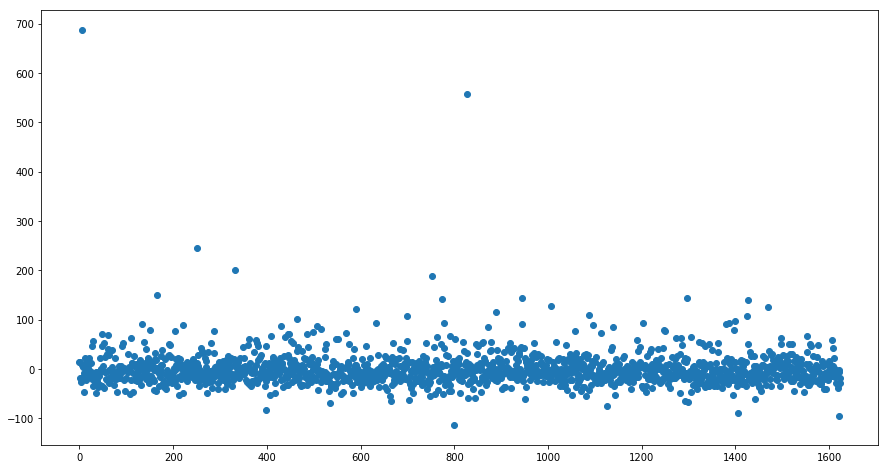

In [182]:
y_pred_train = lasso.predict(X_train_scaled)
diff = y_train - y_pred_train
plt.figure(figsize=(15,8))
plt.scatter(np.arange(len(diff)),diff)

In [183]:
X_train[np.abs(diff)> 100].describe()

,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,latitude,longitude,logreviews,bedrooms_per_accommodates,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.0
mean,20.526316,3.894737,1.473684,5.315789,2.684211,56.160820,10.199296,0.962107,0.482707,0.947368,0.052632,0.0
std,7.010852,6.715610,2.232796,2.583121,2.381704,0.012773,0.030580,1.067560,0.245513,0.229416,0.229416,0.0
min,5.000000,0.000000,0.000000,2.000000,0.000000,56.146937,10.113872,0.000000,0.000000,0.000000,0.000000,0.0
25%,24.000000,0.000000,0.000000,4.000000,1.000000,56.153276,10.198317,0.000000,0.291667,1.000000,0.000000,0.0
50%,24.000000,1.000000,0.000000,5.000000,2.000000,56.157004,10.207048,0.693147,0.500000,1.000000,0.000000,0.0
75%,24.000000,3.500000,4.500000,6.500000,3.500000,56.163500,10.214336,1.497866,0.585714,1.000000,0.000000,0.0
max,24.000000,25.000000,5.000000,10.000000,10.000000,56.192661,10.237410,3.258097,1.000000,1.000000,1.000000,0.0


In [184]:
high_error= X_train[np.abs(diff)>80]
print('size high error: '+ str(len(high_error)))
low_error = X_train[np.abs(diff) < 10]
print('size low error: ' + str(len(low_error)))

size high error: 37
size low error: 560


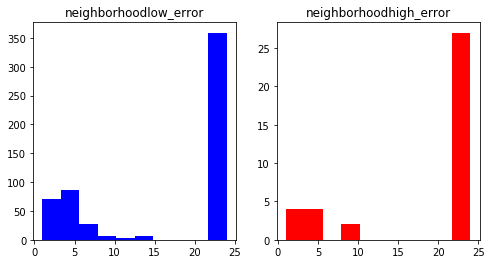

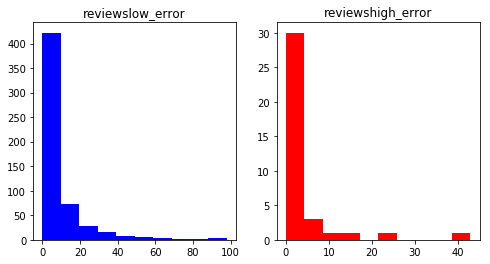

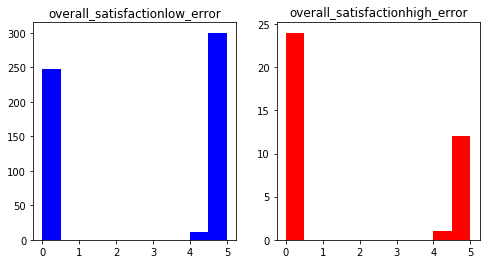

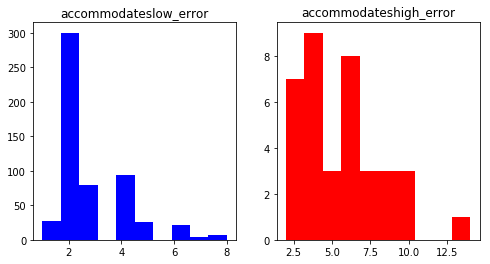

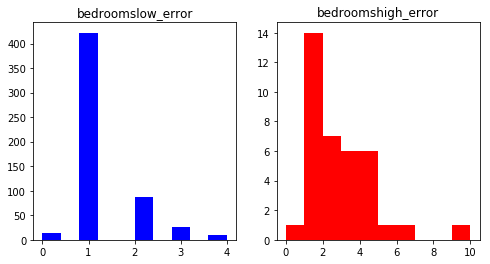

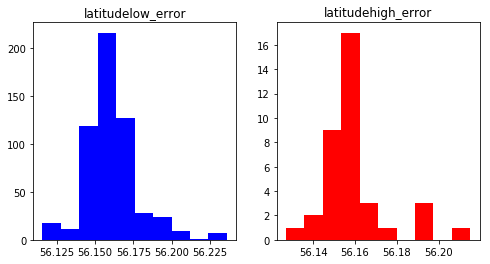

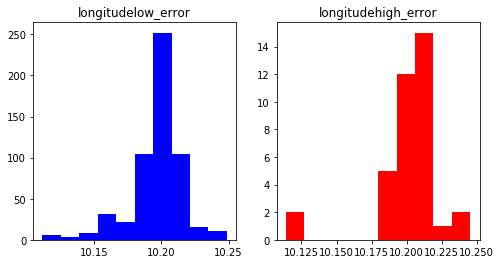

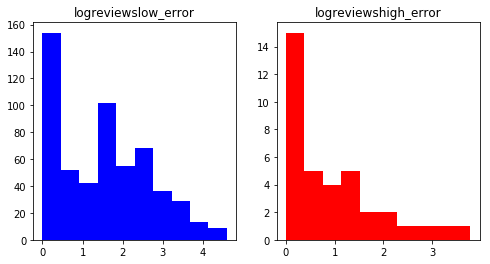

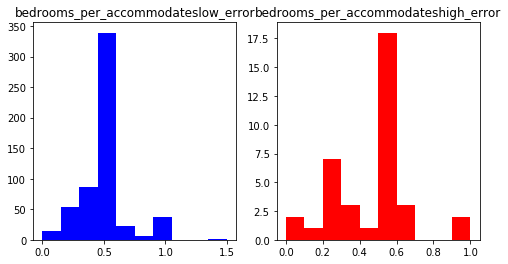

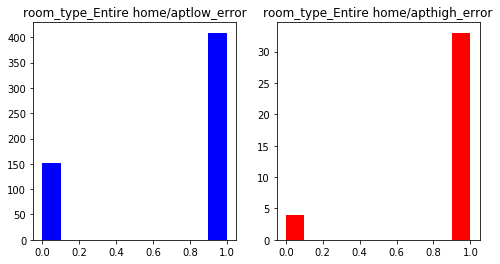

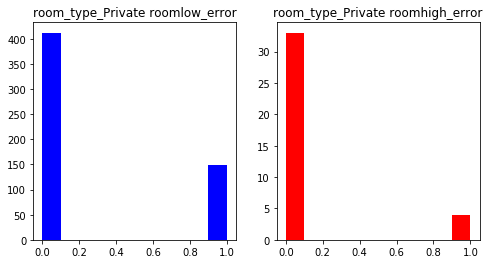

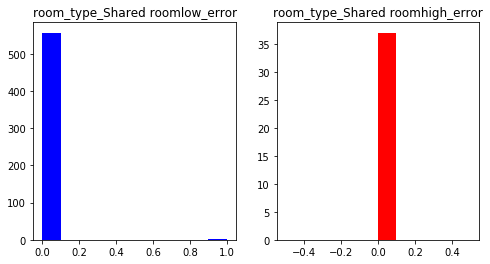

In [192]:
for c in high_error.columns:
    plt.figure(figsize=(8,4))
    plt.subplot(121)
    plt.hist(low_error[c], color='b')
    plt.title(c+'low_error')
    plt.subplot(122)
    plt.hist(high_error[c], color='r')
    plt.title(c + 'high_error')
    plt.show()